# **Домашняя работа №5**

### `Петров Александр ИКБО-40-24`

## 1. Используемые модули

In [1]:
# Работа с данными
import pandas as pd
import numpy as np

# Разделение данных и их стандартизация
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

# Модели, бейзлайн и пайплайн
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Метрики
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    RocCurveDisplay,
    PrecisionRecallDisplay,
    brier_score_loss,
)

# Визуализация кривых
import matplotlib.pyplot as plt

# Воспроизводимость
RANDOM_STATE = 42

In [2]:
# Глобальное зерно
np.random.seed(RANDOM_STATE)

## 2. Простейший EDA

In [3]:
df = pd.read_csv("data/S05-hw-dataset.csv")

df.head(10)

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1
5,6,63,71006,1,712,0.541594,3,0,0,0,14162,372,0.100423,12,0,13,0
6,7,25,37840,25,691,0.032334,1,12,0,0,56999,973,0.432156,12,2,1,0
7,8,55,35993,22,662,0.631521,0,0,0,1,5267,462,0.096401,6,4,2,0
8,9,30,34321,36,687,0.620856,0,7,1,1,20995,3650,0.632998,17,1,1,1
9,10,25,25809,23,601,0.254544,5,0,0,1,38464,3379,0.367238,10,3,0,0


В датасете содержатся следующие столбцы:

- `client_id` – идентификатор клиента (целое число). Используется только как технический ID, в модели его можно не использовать.

- `age` – возраст клиента (целое число).

- `income` – годовой доход клиента (целое число в условных единицах).

- `years_employed` – стаж работы (количество полных лет, целое число).

- `credit_score` – условный кредитный скоринг (целое число). Чем выше значение, тем «надёжнее» клиент.

- `debt_to_income` – отношение ежемесячных долговых платежей к доходу (вещественное число от 0 до 1).

- `num_credit_cards` – количество кредитных карт (целое число).

- `num_late_payments` – количество просрочек платежей за некоторый период (целое число).

- `has_mortgage` – флаг наличия ипотеки (0 – нет, 1 – есть).

- `has_car_loan` – флаг наличия автокредита (0 – нет, 1 – есть).

- `savings_balance` – объём сбережений клиента (целое число, условные единицы).

- `checking_balance` – баланс на расчетном счёте (целое число, может быть отрицательным).

- `region_risk_score` – условный риск региона проживания клиента (вещественное число 0..1; чем больше, тем рискованнее).

- `phone_calls_to_support_last_3m` – количество обращений клиента в поддержку за последние 3 месяца (целое число).

- `active_loans` – количество активных займов (целое число).

- `customer_tenure_years` – сколько лет клиент обслуживается в этом банке (целое число).

- `default` – **целевой бинарный признак**: факт дефолта по кредиту (0/1).  
  Это **таргет**, который нужно предсказывать.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk_score               30

`info()` показал, что в датасете нет пропусков - это хорошо.

In [5]:
df.describe()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,866.169729,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,1.000000,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,750.750000,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,1500.500000,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,2250.250000,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,3000.000000,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000


Описательные статистики в норме.

In [6]:
df.duplicated().sum()  # считаем, сколько дубликатов в датасете

0

Дубликатов нет.

Постараемся найти **невозможные значения**. С финансовыми данными работать тяжело, так как они очень условные, а вот возраст достаточно прозрачен. С самой колонкой `age` все в порядке, но необходимо сравнить значения `age` и `years_employed`, так как соответствующие друг другу значения из второго поля могут превышать значения из первого поля, что невозможно.

Строго говоря, в реальном мире работать раньше 14 лет - странность. Поэтому будем считать, что неподходящие записи можно ловить с помощью условия:

$$
df["age"] < df["years\_employed"] + 14
$$

In [7]:
df[
    df["age"] < df["years_employed"] + 14
]

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
6,7,25,37840,25,691,0.032334,1,12,0,0,56999,973,0.432156,12,2,1,0
8,9,30,34321,36,687,0.620856,0,7,1,1,20995,3650,0.632998,17,1,1,1
9,10,25,25809,23,601,0.254544,5,0,0,1,38464,3379,0.367238,10,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2975,2976,43,91196,33,740,0.124947,4,4,0,0,14830,8765,0.513254,5,0,11,0
2989,2990,41,70168,35,541,0.265943,6,2,0,1,20626,-142,0.227945,1,0,13,0
2992,2993,30,36394,35,724,0.277715,4,10,1,0,40323,5394,0.251583,8,2,11,1
2996,2997,35,54454,36,634,0.396180,5,5,0,0,0,10858,0.506146,2,2,12,0


Целых 805 записей. Они не соответствуют критериям "реального мира" - удаляем их.

In [8]:
i = df[df["age"] < df["years_employed"] + 14].index  # находим индексы неподходящий записей
df = df.drop(i)  # удаляем записи по этому индексу

df.shape  # проверим, что записи удалились и размер изменился

(2195, 17)

Теперь с датасетом все хорошо, можно обучать модель.

Посмотрим на наш целевой признак - поле default.

In [9]:
df["default"].value_counts(normalize=True).to_frame()

,proportion
default,
0,0.588155
1,0.411845


Распределение `default = 1` около 41% среди всех значений, данные не перекошены в какую-то одну сторону - это хорошо.

## 3. Выделение признаков и разделение датасета

In [10]:
# Выделяем признаки и целевую переменную
X = df.drop(columns=["client_id", "default"], axis=1)  # признаки - все, кроме индексов и целевой переменной
y = df["default"]  # целевая переменная

# Делим данные на обучающие и тестовые
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,             # тестовых данных - 20%
    stratify=y,                # сохраняем исходное соотношение классов в обучающей и тестовой выборках
    random_state=RANDOM_STATE  # для воспроизводимости разделения данных
)

print("Размеры выборок:")
print("  train:", X_train.shape)
print("  test: ", X_test.shape)

print("\nРаспределение классов (train):")
print(y_train.value_counts(normalize=True))

print("\nРаспределение классов (test):")
print(y_test.value_counts(normalize=True))

Размеры выборок:
  train: (1756, 15)
  test:  (439, 15)

Распределение классов (train):
default
0    0.588269
1    0.411731
Name: proportion, dtype: float64

Распределение классов (test):
default
0    0.587699
1    0.412301
Name: proportion, dtype: float64


Благодаря использованию `stratify`, распределение классов осталось прежним.

## 4. Бейзлайн-модель

Зачем нужен бейзлайн?

Он помогает проверить адекватность разрабатываемой модели. Результат на уровне с бейзлайном или хуже означает, что она ничем не лучше случайного гадания.

In [11]:
# Создаем простейший классификатор
baseline = DummyClassifier(
    strategy="stratified",     # модель генерирует случайные предсказания, соблюдая пропорции классов обучающей выборки
    random_state=RANDOM_STATE
)

# Обучаем
baseline.fit(X_train, y_train)

# Оцениваем на тестовом наборе, который модель еще не видела
y_test_pred_baseline = baseline.predict(X_test)  # предсказания

print("БЕЙЗЛАЙН DummyClassifier СО СТРАТЕГИЕЙ stratified\n")
print("Accuracy :", accuracy_score(y_test, y_test_pred_baseline))                    # общая точность
print("Precision:", precision_score(y_test, y_test_pred_baseline, zero_division=0))  # точность (доля действительно положительных ответов из всех положительных)
print("Recall   :", recall_score(y_test, y_test_pred_baseline, zero_division=0))     # полнота
print("F1-score :", f1_score(y_test, y_test_pred_baseline, zero_division=0))         # компромисс между точностью и полнотой

# Для ROC-AUC нам нужны вероятности положительного класса
y_test_proba_baseline = baseline.predict_proba(X_test)[:, 1]  # уверенность в ответе

try:
    print("ROC-AUC  :", roc_auc_score(y_test, y_test_proba_baseline))  # качество ранжирования объектов
except ValueError as e:
    print("Не удалось посчитать ROC-AUC для бейзлайна:", e)

БЕЙЗЛАЙН DummyClassifier СО СТРАТЕГИЕЙ stratified

Accuracy : 0.5535307517084282
Precision: 0.45989304812834225
Recall   : 0.47513812154696133
F1-score : 0.4673913043478261
ROC-AUC  : 0.5418326266649535


**Интерпретация метрик**

- `ROC-AUC` (0.54): значение близко к 0.5, что подтверждает абсолютно случайный характер предсказаний и отсутствие предсказательной способности;
- `Accuracy` (0.55): данный показатель даже ниже доли мажоритарного класса в тесте (0.58), что характерно для стратегии stratified из-за случайных ошибок в обоих классах;
- `Precision` (0.46), `Recall` (0.47) и `F1` (0.47): эти метрики подтверждают, что модель ошибается чаще, чем попадает в цель, пытаясь угадать целевое значение.

Дополнительно построим ROC- и PR-кривые, чтобы показать, что модель ни на что не годна.

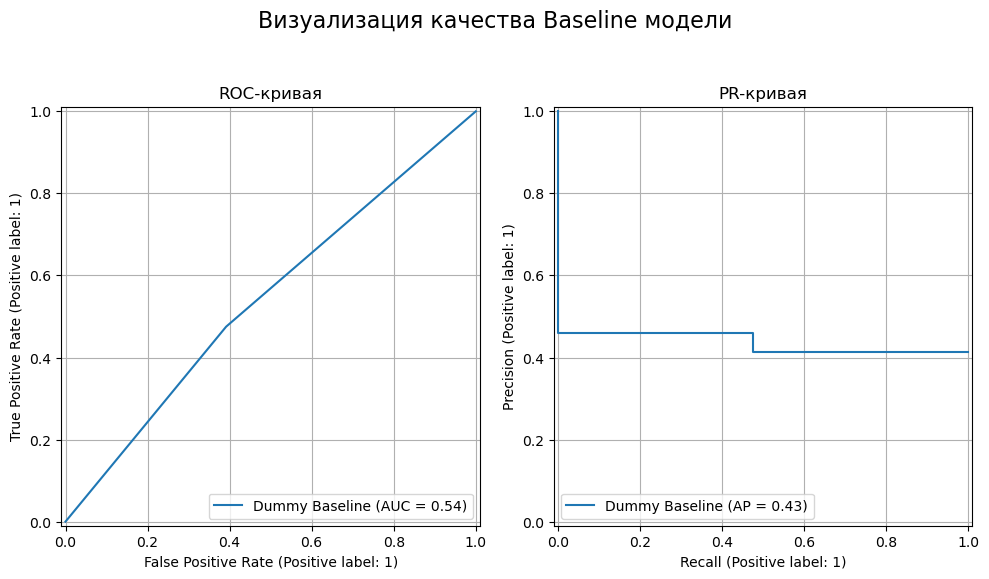

In [12]:
# Создаем фигуру с двумя подграфиками
fig, (ax1, ax2) = plt.subplots(
    1,
    2,
    figsize=(10, 6)
)

# ROC-кривая
RocCurveDisplay.from_predictions(
    y_test, 
    y_test_proba_baseline, 
    ax=ax1, 
    name="Dummy Baseline"
)
ax1.set_title("ROC-кривая")
ax1.grid()

# 2. PR-кривая
PrecisionRecallDisplay.from_predictions(
    y_test, 
    y_test_proba_baseline, 
    ax=ax2, 
    name="Dummy Baseline"
)
ax2.set_title("PR-кривая")
ax2.grid()

# Общее название
plt.suptitle("Визуализация качества Baseline модели", fontsize=16)

# Сохраняем изображение
# fig.savefig("figures/baseline.png")

plt.tight_layout()
plt.show()

## 5. Пайплайн - логистическая регрессия и подбор гиперпараметров

In [13]:
# Создаем пайплайн с логистической регрессией
pipeline = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        (
            "log_reg",
            LogisticRegression(
                penalty="l2",  # штраф; используем l2, чтобы избежать переобучения
                random_state=RANDOM_STATE
            )
        )
    ]
)

In [14]:
# Используем решетчатый поиск лучших гиперпараметров
param_grid = {
    'log_reg__C': [0.01, 0.1, 1, 10, 100]  # пробуем разную силу регуляризации
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring="roc_auc",  # выбираем метрику, которую хотим максимизировать
    cv=5,               # количество фолдов для кросс-валидации
    n_jobs=-1,          # использовать все ядра процессора
    verbose=1           # чтобы видеть процесс обучения
)

grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)
print("Лучший ROC-AUC (по CV):", grid_search.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Лучшие параметры: {'log_reg__C': 0.1}
Лучший ROC-AUC (по CV): 0.8676753779708493


In [15]:
# Берем лучшую модель
log_reg = grid_search.best_estimator_

# Получаем предсказания классов и вероятности
y_test_pred = log_reg.predict(X_test)
y_test_proba = log_reg.predict_proba(X_test)[:, 1]

print("РЕЗУЛЬТАТЫ ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ\n")
print("Accuracy :", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred, zero_division=0))
print("Recall   :", recall_score(y_test, y_test_pred, zero_division=0))
print("F1-score :", f1_score(y_test, y_test_pred, zero_division=0))
print("ROC-AUC  :", roc_auc_score(y_test, y_test_proba))

print("\nПодробный отчёт по классам (classification_report):")
print(classification_report(y_test, y_test_pred))

РЕЗУЛЬТАТЫ ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ

Accuracy : 0.7881548974943052
Precision: 0.7528735632183908
Recall   : 0.7237569060773481
F1-score : 0.7380281690140845
ROC-AUC  : 0.8726283780889973

Подробный отчёт по классам (classification_report):
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       258
           1       0.75      0.72      0.74       181

    accuracy                           0.79       439
   macro avg       0.78      0.78      0.78       439
weighted avg       0.79      0.79      0.79       439



## 6. Сравнение результатов

In [16]:
results = pd.DataFrame({
    "Метрика": [
        "Accuracy",
        "Precision",
        "Recall",
        "F1-score",
        "ROC-AUC"
    ],
    "Бейзлайн": [
        accuracy_score(y_test, y_test_pred_baseline),
        precision_score(y_test, y_test_pred_baseline, zero_division=0),
        recall_score(y_test, y_test_pred_baseline, zero_division=0),
        f1_score(y_test, y_test_pred_baseline, zero_division=0),
        roc_auc_score(y_test, y_test_proba_baseline)
    ],
    "Логистическая регрессия": [
        accuracy_score(y_test, y_test_pred),
        precision_score(y_test, y_test_pred, zero_division=0),
        recall_score(y_test, y_test_pred, zero_division=0),
        f1_score(y_test, y_test_pred, zero_division=0),
        roc_auc_score(y_test, y_test_proba)
    ]
})

# Рассчитаем прирост по сравнению с бейзлайном
results["Улучшение"] = results["Логистическая регрессия"] - results["Бейзлайн"]

results

,Метрика,Бейзлайн,Логистическая регрессия,Улучшение
0,Accuracy,0.553531,0.788155,0.234624
1,Precision,0.459893,0.752874,0.292981
2,Recall,0.475138,0.723757,0.248619
3,F1-score,0.467391,0.738028,0.270637
4,ROC-AUC,0.541833,0.872628,0.330796


Логистическая регрессия продемонстрировала отличный результат по сравнению с бейзлайном!

Модель по всем метрикам значительно обходит базовый классификатор. Несмотря на умеренный дисбаланс в данных, модель достигла высокого `Recall` (0.72). Текущий уровень `ROC-AUC` (0.87) позволяет использовать данную модель как рабочее решение.

Дополнительно визуализируем и графически сравним бейзлайн и логистическую регрессию.

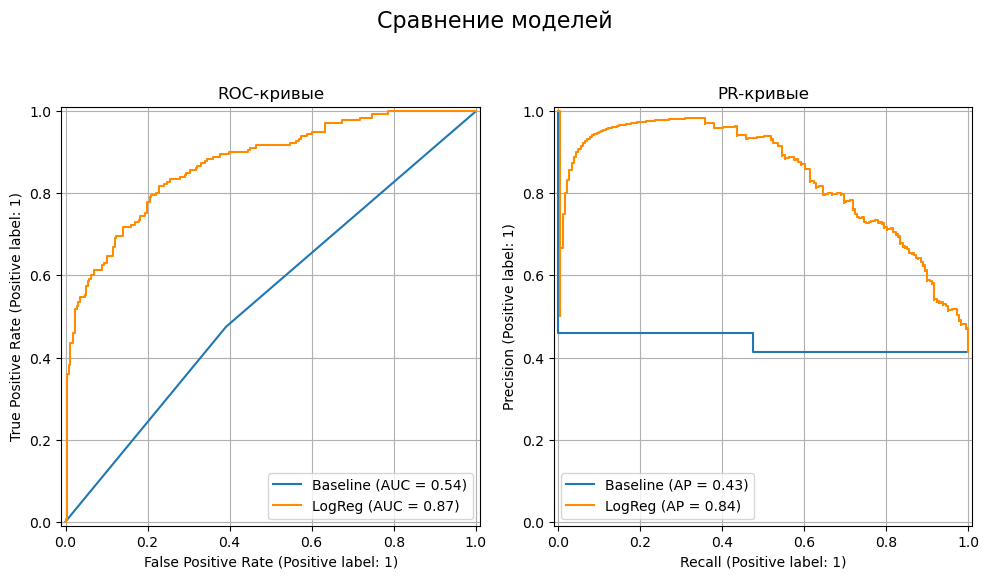

In [ ]:
fig, (ax1, ax2) = plt.subplots(
    1,
    2,
    figsize=(10, 6)
)

# Сравниваем ROC-кривые: сначала бейзлайн, потом лучшая модель
RocCurveDisplay.from_predictions(
    y_test,
    y_test_proba_baseline,
    ax=ax1,
    name="Baseline"
)
RocCurveDisplay.from_predictions(
    y_test,
    y_test_proba,
    ax=ax1,
    name="LogReg",
    color="darkorange"
)
ax1.set_title("ROC-кривые")
ax1.grid()

# Сравниваем PR-кривые
PrecisionRecallDisplay.from_predictions(
    y_test,
    y_test_proba_baseline,
    ax=ax2,
    name="Baseline"
)
PrecisionRecallDisplay.from_predictions(
    y_test,
    y_test_proba,
    ax=ax2,
    name="LogReg",
    color="darkorange"
)
ax2.set_title("PR-кривые")
ax2.grid()

plt.suptitle("Сравнение моделей", fontsize=16)

# fig.savefig("figures/comparison.png")

plt.tight_layout()
plt.show()

Чем выше оранжевая кривая над синей - тем лучше умная модель справляется по сравнения с бейзлайном.

# Вывод

В ходе выполнения работы была проведена оценка качества базовой модели (`DummyClassifier`) и оптимизированной логистической регрессии. Логистическая регрессия показала значительное превосходство над бейзлайном по всем ключевым метрикам. `Accuracy` выросла с 0.55 до 0.79, а `ROC-AUC` увеличился с 0.54 до 0.87, что говорит о высокой способности модели разделять классы и ранжировать клиентов по степени риска.

Использование подбора гиперпараметра `C` позволило найти оптимальный баланс регуляризации: модель не переобучилась под тренировочные данные, сохранив высокую обобщающую способность на тестовой выборке. Значение `F1-score` на уровне 0.74 подтверждает, что алгоритм успешно находит компромисс между точностью предсказания дефолта и полнотой охвата проблемных кейсов.

Логистическая регрессия является разумным выбором для данной задачи, так как её качество существенно выше случайного угадывания и она демонстрирует стабильные результаты на обоих классах.